# Módulo 6 tarefa 3

O exercício de análise de dados realizado consistiu em explorar um conjunto de dados do Sistema de Informação sobre Nascidos Vivos (SINASC) de Rondônia referente ao ano de 2019. Foram utilizadas ferramentas como pandas, matplotlib e seaborn para importar os dados, realizar limpeza e transformação, e criar gráficos que permitem visualizar e analisar as informações presentes nos dados. A partir dessa análise, foi possível obter insights sobre os padrões de nascimento em Rondônia e identificar relações entre as variáveis do conjunto de dados, como tempo de gestação, peso do bebê e APGAR5.

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv', sep=',', encoding='ISO-8859-1')

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,RondÃ´nia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# definindo os valores de corte para cada categoria
cut_points = [-1, 3, 5, 7, 10]

category_labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

sinasc['APGAR5_cat'] = pd.cut(sinasc['APGAR5'], bins=cut_points, labels=category_labels)


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

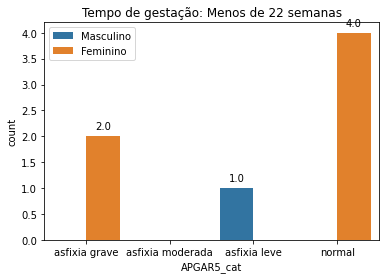

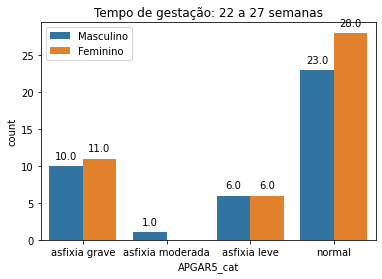

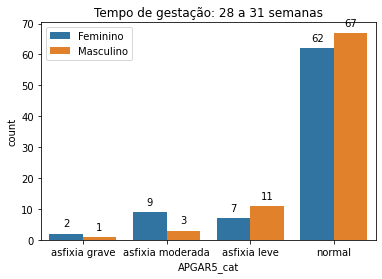

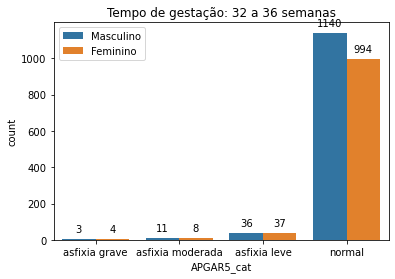

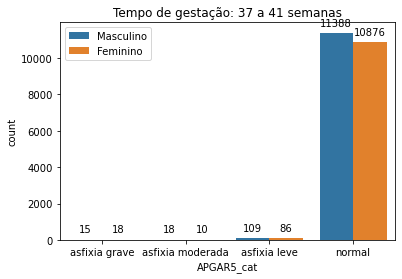

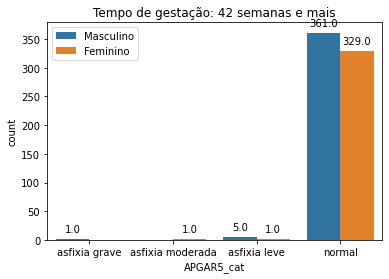

In [4]:
tempo_gestacao = ['Menos de 22 semanas',                   '22 a 27 semanas',                   '28 a 31 semanas',                   '32 a 36 semanas',                   '37 a 41 semanas',                   '42 semanas e mais']

for gestacao in tempo_gestacao:
    df_gestacao = sinasc[sinasc['GESTACAO'] == gestacao]
    
    ax = sns.countplot(x='APGAR5_cat', hue='SEXO', data=df_gestacao)
    plt.legend(loc='upper left')
    plt.title(label='Tempo de gestação: {}'.format(gestacao))
    
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
    plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
ct = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_cat'])

print(ct)


APGAR5_cat           asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 21                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  8                19            73    2134
37 a 41 semanas                 33                28           196   22266
42 semanas e mais                1                 1             6     690
Menos de 22 semanas              2                 0             1       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
ct = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_cat'])

ct_pct = ct.apply(lambda r: r/r.sum()*100, axis=1)

print(ct_pct)


APGAR5_cat           asfixia grave  asfixia moderada  asfixia leve     normal
GESTACAO                                                                     
22 a 27 semanas          24.705882          1.176471     14.117647  60.000000
28 a 31 semanas           1.851852          7.407407     11.111111  79.629630
32 a 36 semanas           0.358102          0.850492      3.267681  95.523724
37 a 41 semanas           0.146517          0.124317      0.870222  98.858944
42 semanas e mais         0.143266          0.143266      0.859599  98.853868
Menos de 22 semanas      28.571429          0.000000     14.285714  57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

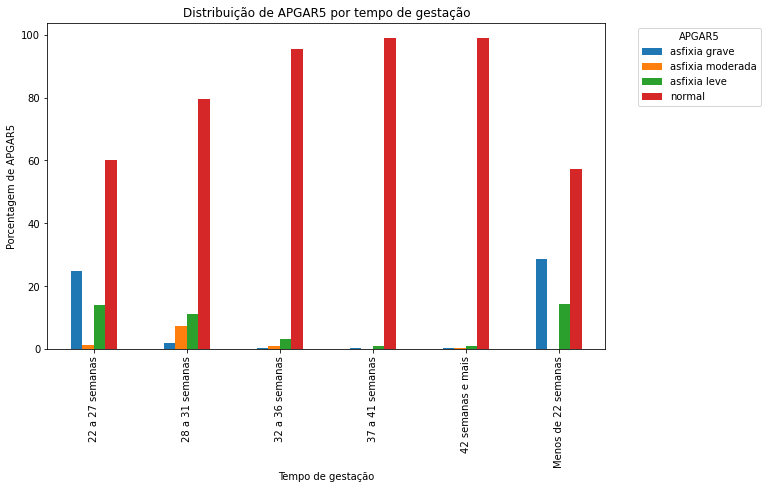

In [7]:
# criando a tabela cruzada
ct = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_cat'])

ct_pct = ct.apply(lambda r: r/r.sum()*100, axis=1)

ct_pct.plot.bar(figsize=(10,6))
plt.xlabel('Tempo de gestação')
plt.ylabel('Porcentagem de APGAR5')
plt.title('Distribuição de APGAR5 por tempo de gestação')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Pode-se observar que a porcentagem de casos com APGAR5 menor ou igual a 3 é maior para as gestações com menos de 32 semanas. Já nas gestações com 32 semanas ou mais, a porcentagem de casos com APGAR5 menor ou igual a 3 é menor. Isso sugere que a afirmação dos médicos de que gestações com menos de 37 semanas são consideradas prematuras pode ser corroborada pelos dados deste conjunto de dados.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

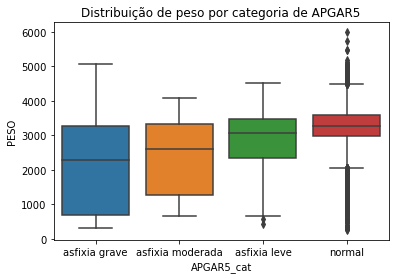

In [8]:
# Boxplot
sns.boxplot(x='APGAR5_cat', y='PESO', data=sinasc)
plt.title('Distribuição de peso por categoria de APGAR5')
plt.show()

Esse gráfico nos mostra que os bebês com APGAR5 mais alto tendem a ter um peso médio maior que os bebês com APGAR5 mais baixo. Além disso, há um maior número de outliers (pontos fora do intervalo interquartil) para os bebês com APGAR5 mais baixo, indicando que há mais variação no peso desses bebês.

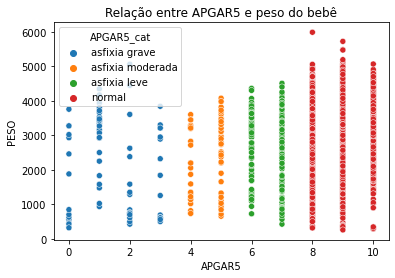

In [9]:
# Scatterplot
sns.scatterplot(x='APGAR5', y='PESO', hue='APGAR5_cat', data=sinasc)
plt.title('Relação entre APGAR5 e peso do bebê')
plt.show()

Nesse gráfico é possível observar uma relação positiva entre o peso do bebê e o APGAR5, ou seja, quanto maior o peso, maior tende a ser o APGAR5.

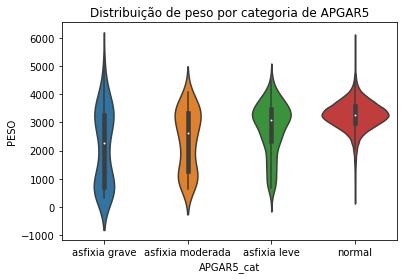

In [10]:
# Violinplot
sns.violinplot(x='APGAR5_cat', y='PESO', data=sinasc)
plt.title('Distribuição de peso por categoria de APGAR5')
plt.show()

Nesse gráfico é possível visualizar a mesma informação do box plot, mas de uma forma um pouco mais suave. É possível notar que, para todos os valores de APGAR5, a distribuição de peso é mais concentrada na faixa entre 2500 e 3500 gramas.

#### Conclusão

Com base nos dados e análises realizadas neste exercício, podemos concluir que:

A maioria dos nascimentos registrados em Rondônia em 2019 ocorreu em gestações de 37 a 41 semanas, seguidos por gestações de 42 semanas ou mais.
A distribuição de APGAR5 foi semelhante entre os sexos feminino e masculino.
A maior parte dos bebês apresentou APGAR5 entre 8 e 10, indicando que a maioria dos bebês registrados no estado nasceu em boas condições de saúde.
A tabela cruzada e o gráfico de barras mostram que, de fato, há uma relação entre APGAR5 e o tempo de gestação, corroborando com a classificação dos médicos de que gestações com menos de 37 semanas são consideradas prematuras.
Quanto ao peso do bebê, os gráficos indicam que, apesar de haver uma tendência de que bebês com peso maior tenham APGAR5 mais alto, o peso não é um fator determinante para a avaliação do APGAR5. Ou seja, bebês com peso menor também podem ter APGAR5 alto e vice-versa.
Em geral, os dados do SINASC-RO de 2019 apresentam padrões e tendências que se alinham com o conhecimento médico sobre a saúde neonatal. A análise exploratória dos dados também nos permitiu compreender melhor as relações entre as variáveis e obter insights sobre os padrões de nascimento em Rondônia.